In [1]:
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
MAY=pd.read_csv('C:/data/DACON/KRI-DAC_Jeju_data5.txt',sep=',')
JUNE=pd.read_csv('C:/data/DACON/KRI-DAC_Jeju_data6.txt',sep=',')
JULY=pd.read_csv('C:/data/DACON/KRI-DAC_Jeju_data7.txt',sep=',')
AUGUST=pd.read_csv('C:/data/DACON/KRI-DAC_Jeju_data8.txt',sep=',')

In [2]:
JULY.columns

Index(['OBJECTID', 'Field1', 'YM', 'SIDO', 'SIGUNGU', 'X', 'Y', 'FranClass',
       'Type', 'Time', 'TotalSpent', 'DisSpent', 'NumofSpent', 'NumofDisSpent',
       'POINT_X', 'POINT_Y'],
      dtype='object')

In [3]:
# 1열,2열 제거
group=[MAY,JUNE,JULY,AUGUST]
for i in range(len(group)):
    group[i].drop(group[i].columns[[0,1]],axis=1,inplace=True)

In [4]:
# 7월 필요없는 변수 제거 
JULY.drop(JULY[['X','Y']],axis=1,inplace=True)

In [5]:
# 데이터프레임 병합
GROUP= pd.concat([MAY,JUNE,JULY,AUGUST])

In [6]:
GROUP_YM=GROUP.loc[:,['YM','TotalSpent','DisSpent','NumofSpent','NumofDisSpent']].groupby(['YM'],as_index=False).sum()

In [7]:
GROUP

,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
0,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06
1,202005,제주특별자치도,제주시,영세,단란주점,00시,1180000,0,3,0,877005.7447,1.479816e+06
2,202005,제주특별자치도,제주시,중소1,편의점,00시,157670,6850,20,2,877056.6756,1.479616e+06
3,202005,제주특별자치도,제주시,영세,편의점,00시,46600,0,2,0,877055.9593,1.479766e+06
4,202005,제주특별자치도,제주시,영세,주점,00시,66000,0,2,0,877055.4817,1.479866e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
280080,202008,제주특별자치도,제주시,영세,편의점,x시,13700,0,2,0,950266.5976,1.502458e+06
280081,202008,제주특별자치도,제주시,영세,일반한식,x시,56000,0,1,0,950317.5379,1.502258e+06
280082,202008,제주특별자치도,제주시,영세,일반한식,x시,28000,0,1,0,950469.1585,1.501909e+06
280083,202008,제주특별자치도,제주시,중소1,중국음식,x시,46000,0,3,0,950574.6388,1.500760e+06


In [8]:
X=GROUP_YM[['TotalSpent','DisSpent','NumofSpent','NumofDisSpent']]
y=GROUP_YM[['YM']]

In [9]:
GROUP_YM

,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent
0,202005,168687712199,24180094624,5151045,782769
1,202006,166978502264,9666349024,5185908,384342
2,202007,179293584847,1343557825,5746845,56363
3,202008,185466211151,543655174,5834132,18660


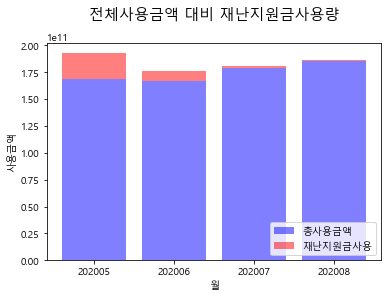

In [11]:
import numpy as np
label =['202005','202006','202007','202008']
N=len(GROUP_YM['YM'].unique())
index=np.arange(N)
alpha=0.5

p1=plt.bar(label,GROUP_YM['TotalSpent'],color='b',alpha=alpha)
p2=plt.bar(label,GROUP_YM['DisSpent'],color='r',alpha=alpha, bottom=GROUP_YM['TotalSpent'])
plt.title('전체사용금액 대비 재난지원금사용량\n', fontsize=15)
plt.ylabel('사용금액')
plt.xlabel('월')
plt.legend((p1[0],p2[0]),('총사용금액','재난지원금사용'),fontsize=10,loc=4)
plt.show()

In [63]:
GROUP.loc[:,['Type','TotalSpent','DisSpent','NumofSpent','NumofDisSpent']].groupby(['Type'],as_index=True).sum().sort_values(by='DisSpent',ascending=False).head(10)

,TotalSpent,DisSpent,NumofSpent,NumofDisSpent
Type,,,,
일반한식,119782556296,6026486130,3301893,184580
슈퍼마켓,54684011769,5275406519,2347107,212527
농축협직영매장,21775667800,2609627232,593005,65243
편의점,39477932065,2022731930,4938511,226371
주유소,33650643540,1962843870,766793,41326
농협하나로클럽,10409721850,1356168646,214102,25365
스포츠레져용품,11590067771,1340087205,160174,16126
약국,13437995166,1056396320,665424,58987
서양음식,26851921875,1006835289,1851230,73269


### 재난지원금 사용이 제한되는 업종 파악 

In [55]:
Type_sum=GROUP.groupby(['Type'],as_index=False).sum()
Type_sum[Type_sum['DisSpent']==0]['Type']

13             골동품점
14            골프경기장
15            골프연습장
17             공공요금
21              귀금속
32          기타대인서비스
35          기타비영리유통
55              노래방
60             단란주점
63            대학등록금
71              면세점
85            부동산분양
90     사무서비스(회원제형태)
95              상품권
98            성인용품점
102            손해보험
104           수입자동차
117        안마스포츠마사지
132            유흥주점
136           이륜차판매
139         인터넷Mall
140       인터넷종합Mall
159           조세서비스
169           중고자동차
181            칵테일바
198             항공사
Name: Type, dtype: object

### 재난지원금제도에 가장 영향이 큰 업종과 그렇지 않은 업종

In [108]:
not_benefit=GROUP[GROUP['DisSpent']!=0].loc[:,['Type','DisSpent','NumofDisSpent']].groupby(['Type'],as_index=True).sum().sort_values(by='DisSpent',ascending=True).head(10)
benefit=GROUP[GROUP['DisSpent']!=0].loc[:,['Type','DisSpent','NumofDisSpent']].groupby(['Type'],as_index=True).sum().sort_values(by='DisSpent',ascending=False).head(10)

Text(0.5, 1.0, '업종별 재난지원금 사용금액 하위 10개')

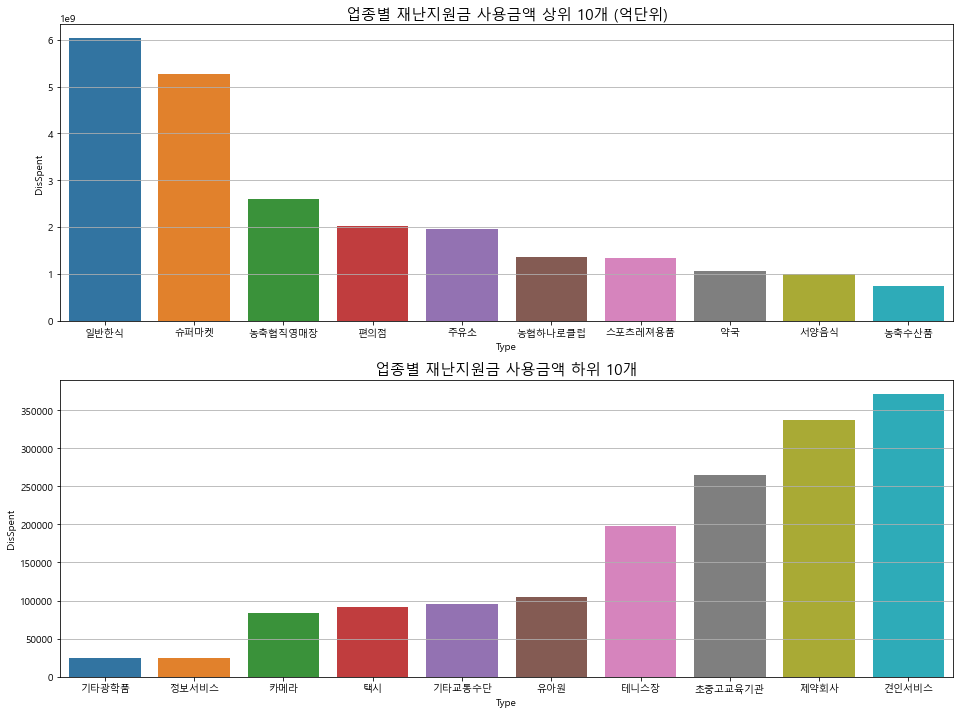

In [114]:
fig,ax = plt.subplots(2,1,figsize=(16,12))
sns.barplot(x=benefit.index,y=benefit['DisSpent'],ax=ax[0])
ax[0].set_title("업종별 재난지원금 사용금액 상위 10개 (억단위)",fontsize=15)
sns.barplot(x=not_benefit.index,y=not_benefit['DisSpent'],ax=ax[1])
ax[1].set_title('업종별 재난지원금 사용금액 하위 10개',fontsize=15)



In [132]:
GROUP.reset_index()

,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
0,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06
1,202005,제주특별자치도,제주시,영세,단란주점,00시,1180000,0,3,0,877005.7447,1.479816e+06
2,202005,제주특별자치도,제주시,중소1,편의점,00시,157670,6850,20,2,877056.6756,1.479616e+06
3,202005,제주특별자치도,제주시,영세,편의점,00시,46600,0,2,0,877055.9593,1.479766e+06
4,202005,제주특별자치도,제주시,영세,주점,00시,66000,0,2,0,877055.4817,1.479866e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
1119424,202008,제주특별자치도,제주시,영세,편의점,x시,13700,0,2,0,950266.5976,1.502458e+06
1119425,202008,제주특별자치도,제주시,영세,일반한식,x시,56000,0,1,0,950317.5379,1.502258e+06
1119426,202008,제주특별자치도,제주시,영세,일반한식,x시,28000,0,1,0,950469.1585,1.501909e+06
1119427,202008,제주특별자치도,제주시,중소1,중국음식,x시,46000,0,3,0,950574.6388,1.500760e+06
